In [1]:
import torch
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR, MODELS_DIR
from src.utils import enumerate_binary_inputs, tmp_if_debug
from glob import glob

DEBUG = False    

In [2]:
models = glob(str(tmp_if_debug(MODELS_DIR / "*.pt.fourier", debug=DEBUG)))
# model_dict = {arg_hash: [f for f in models if arg_hash in f][0] for arg_hash in arg_hashes}
models

['../models/train_turbo_fourier_block_len_16_e456e390bff5fabe66798bbccc2785d178a50ef4.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_51cd79cd5e0be39480f3315f4e995a54f033f2b1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_f60420be03339f88d563ad81410712f57afe5b1a.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_4b4d645e9558a68d125e888ea27748e80d22dd16.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_db19ded0522355346cbfeec1adcdff17ac975e8f.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_2f042aebcf61edd13658e41b05501055b4ba2d3b.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_21e2cf0ce5c148dd5e368bcd26882f8af36bc3d1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_72484df0f62111d1f8f5a3875a392621d3a6da06.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_146a44de6b8d2bbb9d3f98d49d80ec265fb66394.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_b1c5274ec7fba8451add09c8b6ecb7b903496ee6.pt.fourier',
 '../model

In [9]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
mpl.rcParams['figure.dpi'] = 100

def plot_fourier_coefs(fourier_coefs, title, cmap, dev=float('inf'), log_color_norm=False):
    window = int(math.log2(fourier_coefs.shape[1]))
    
    ncols = 3
    nrows = 1
    if dev == float('inf'):
        dev = max(np.max(np.abs(fourier_coefs)), 1)
    norm = colors.Normalize(vmin=-dev, vmax=dev)
    bin_in = enumerate_binary_inputs(window=window, dtype=torch.float)
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(nrows, ncols, 1)
    bin_data = ax1.imshow(bin_in, cmap=cmap,norm=norm)
    # ax1.set_yticks(fontsize=6)
    # ax1.set_xticks(fontsize=6)
    ax2 = fig.add_subplot(nrows, ncols, 2)
    fourier_data = ax2.imshow(fourier_coefs[0], cmap=cmap, norm=norm)
    # ax2.set_yticks(fontsize=6)
    # ax2.set_xticks(fontsize=6)
    
    ax3 = fig.add_subplot(nrows, ncols, 3)
    ax3.imshow(fourier_coefs[-1], cmap=cmap, norm=norm)
    
    print((fourier_coefs[0] == fourier_coefs[-1]).all())
    
    def update(w =0):
        fourier_data.set_data(fourier_coefs[int(w)])
        fig.canvas.draw_idle()
    
    interact(update, w=(0, len(fourier_coefs)-1, 1))

['../models/train_turbo_fourier_block_len_16_e456e390bff5fabe66798bbccc2785d178a50ef4.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_51cd79cd5e0be39480f3315f4e995a54f033f2b1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_f60420be03339f88d563ad81410712f57afe5b1a.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_4b4d645e9558a68d125e888ea27748e80d22dd16.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_db19ded0522355346cbfeec1adcdff17ac975e8f.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_2f042aebcf61edd13658e41b05501055b4ba2d3b.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_21e2cf0ce5c148dd5e368bcd26882f8af36bc3d1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_72484df0f62111d1f8f5a3875a392621d3a6da06.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_146a44de6b8d2bbb9d3f98d49d80ec265fb66394.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_b1c5274ec7fba8451add09c8b6ecb7b903496ee6.pt.fourier',
 '../model

interactive(children=(IntSlider(value=0, description='w', max=300), Output()), _dom_classes=('widget-interact'…

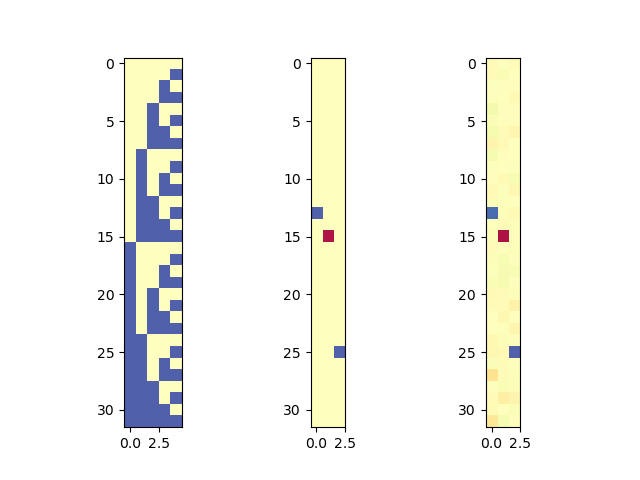

In [25]:
model_fp = '../models/train_turbo_table_block_len_16_7f7a61dd4c93cfaeb103d0093fcc98f5959ca30b.pt.fourier'


s_data = torch.load(model_fp)
k1= "noninterleaved"
k2 = "interleaved"
params = torch.stack([torch.cat([param_dict[k1], param_dict[k2]], dim=1) for param_dict in s_data], dim=0)
plot_fourier_coefs(params.detach().numpy(), title=plot_fourier_coefs, cmap=plt.get_cmap('Spectral'))


In [26]:
def plot_fourier_bar(fourier_coefs, stream: int, title, log_color_norm=False):
    window = int(math.log2(fourier_coefs.shape[1]))
    
    ncols = 3
    nrows = 1
    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    x_vals = np.arange(fourier_coefs.shape[1])
    bar_plot = ax.bar(x=x_vals, height=fourier_coefs[0, :, stream])
    ax.set_title(f"stream={stream}:{title}")
    
    def update(w =0):
        for rect,h in zip(bar_plot, fourier_coefs[int(w), :, stream]):
            rect.set_height(h)
        fig.canvas.draw_idle()
    
    interact(update, w=(0, len(fourier_coefs)-1, 1))

['../models/train_turbo_fourier_block_len_16_e456e390bff5fabe66798bbccc2785d178a50ef4.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_51cd79cd5e0be39480f3315f4e995a54f033f2b1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_f60420be03339f88d563ad81410712f57afe5b1a.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_4b4d645e9558a68d125e888ea27748e80d22dd16.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_db19ded0522355346cbfeec1adcdff17ac975e8f.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_2f042aebcf61edd13658e41b05501055b4ba2d3b.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_21e2cf0ce5c148dd5e368bcd26882f8af36bc3d1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_72484df0f62111d1f8f5a3875a392621d3a6da06.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_146a44de6b8d2bbb9d3f98d49d80ec265fb66394.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_b1c5274ec7fba8451add09c8b6ecb7b903496ee6.pt.fourier',
 '../model

interactive(children=(IntSlider(value=0, description='w', max=300), Output()), _dom_classes=('widget-interact'…

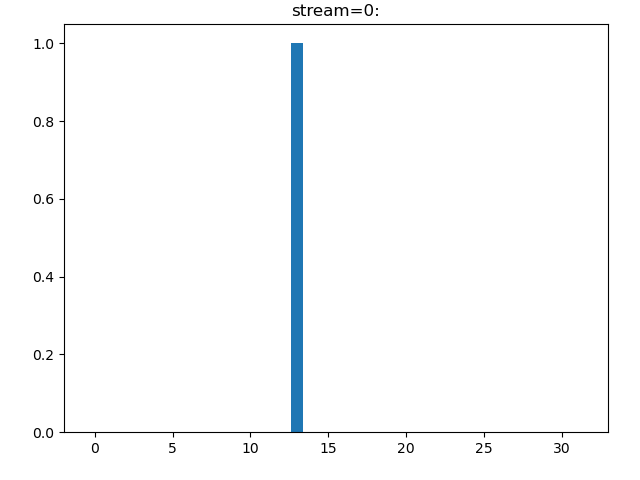

In [27]:
from pprint import pprint
pprint(models)
print("=====================")
print(model_fp)
s_data = torch.load(model_fp)
k1= "noninterleaved"
k2 = "interleaved"
params = torch.stack([torch.cat([param_dict[k1], param_dict[k2]], dim=1) for param_dict in s_data], dim=0)
plot_fourier_bar(params.detach().numpy(), stream=0, title="")

['../models/train_turbo_fourier_block_len_16_e456e390bff5fabe66798bbccc2785d178a50ef4.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_51cd79cd5e0be39480f3315f4e995a54f033f2b1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_f60420be03339f88d563ad81410712f57afe5b1a.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_4b4d645e9558a68d125e888ea27748e80d22dd16.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_db19ded0522355346cbfeec1adcdff17ac975e8f.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_2f042aebcf61edd13658e41b05501055b4ba2d3b.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_21e2cf0ce5c148dd5e368bcd26882f8af36bc3d1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_72484df0f62111d1f8f5a3875a392621d3a6da06.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_146a44de6b8d2bbb9d3f98d49d80ec265fb66394.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_b1c5274ec7fba8451add09c8b6ecb7b903496ee6.pt.fourier',
 '../model

interactive(children=(IntSlider(value=0, description='w', max=300), Output()), _dom_classes=('widget-interact'…

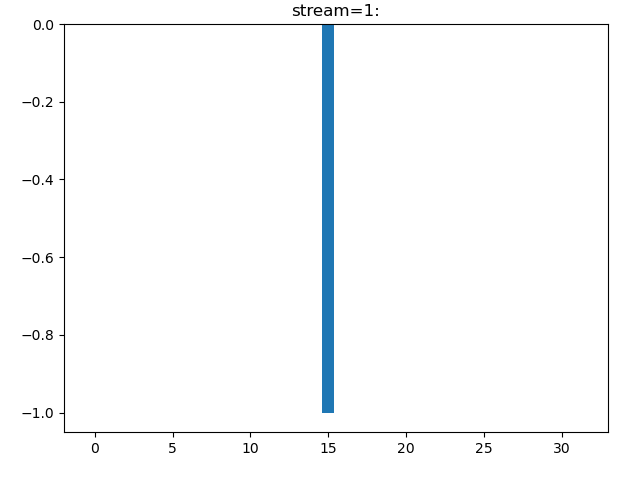

In [28]:
from pprint import pprint
pprint(models)
print("=====================")
print(model_fp)
s_data = torch.load(model_fp)
k1= "noninterleaved"
k2 = "interleaved"
params = torch.stack([torch.cat([param_dict[k1], param_dict[k2]], dim=1) for param_dict in s_data], dim=0)
plot_fourier_bar(params.detach().numpy(), stream=1, title=f"")

['../models/train_turbo_fourier_block_len_16_e456e390bff5fabe66798bbccc2785d178a50ef4.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_51cd79cd5e0be39480f3315f4e995a54f033f2b1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_f60420be03339f88d563ad81410712f57afe5b1a.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_4b4d645e9558a68d125e888ea27748e80d22dd16.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_db19ded0522355346cbfeec1adcdff17ac975e8f.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_2f042aebcf61edd13658e41b05501055b4ba2d3b.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_21e2cf0ce5c148dd5e368bcd26882f8af36bc3d1.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_72484df0f62111d1f8f5a3875a392621d3a6da06.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_146a44de6b8d2bbb9d3f98d49d80ec265fb66394.pt.fourier',
 '../models/train_turbo_fourier_block_len_16_b1c5274ec7fba8451add09c8b6ecb7b903496ee6.pt.fourier',
 '../model

interactive(children=(IntSlider(value=0, description='w', max=300), Output()), _dom_classes=('widget-interact'…

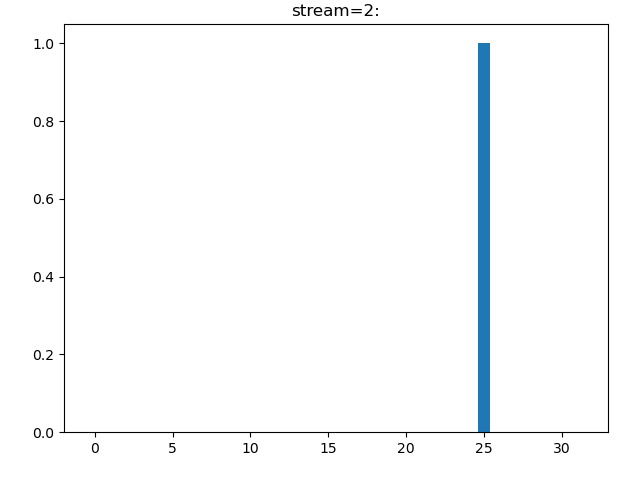

In [29]:
from pprint import pprint
pprint(models)
print("=====================")
print(model_fp)
s_data = torch.load(model_fp)
k1= "noninterleaved"
k2 = "interleaved"
params = torch.stack([torch.cat([param_dict[k1], param_dict[k2]], dim=1) for param_dict in s_data], dim=0)
stream = 2
plot_fourier_bar(params.detach().numpy(), stream=stream, title=f"")